**Nama**  : Dhaifan Satriaji

**ID Siswa** : M128X0209

**Kelas** : M06

In [48]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [49]:
from google.colab import files
files.upload()

Saving BTC-USD.csv to BTC-USD.csv


{'BTC-USD.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800\n2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200\n2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700\n2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600\n2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100\n2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600\n2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500\n2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700\n2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400\n2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800\n2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300\n2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300\n2014-09-29,376.928009,385.2

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [51]:
btc_file_path = '../content/BTC-USD.csv'

df = pd.read_csv(btc_file_path)

y = df['Adj Close'] 

btc_features = ['Open','High', 'Low', 'Volume']
X = df[btc_features]
X.head()

,Open,High,Low,Volume
0,465.864014,468.174011,452.421997,21056800
1,456.859985,456.859985,413.104004,34483200
2,424.102997,427.834991,384.532013,37919700
3,394.673004,423.295990,389.882996,36863600
4,408.084991,412.425995,393.181000,26580100


In [52]:
df.isnull().values.any()

False

In [53]:
btc_model = LinearRegression()

btc_model.fit(X, y)

print("Making predicitons for the first 5 entries\n")
print(X.head())
print("\nThe predictions are:\n")
print(btc_model.predict(X.head()))
print("\nThe actual values are:\n")
print(y.head())

Making predicitons for the first 5 entries

         Open        High         Low    Volume
0  465.864014  468.174011  452.421997  21056800
1  456.859985  456.859985  413.104004  34483200
2  424.102997  427.834991  384.532013  37919700
3  394.673004  423.295990  389.882996  36863600
4  408.084991  412.425995  393.181000  26580100

The predictions are:

[457.87822449 427.9886841  401.40026749 416.34274704 401.3506126 ]

The actual values are:

0    457.334015
1    424.440002
2    394.795990
3    408.903992
4    398.821014
Name: Adj Close, dtype: float64


In [54]:
predicted_adj_close = btc_model.predict(X.head())
print(mean_absolute_error(y.head(),predicted_adj_close))

predicted_adj_close = btc_model.predict(X)
print(mean_absolute_error(y, predicted_adj_close))

4.133104544418449
135.49776893381215


In [55]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
btc_model = LinearRegression()
btc_model.fit(train_X, train_y)

val_predictions = btc_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

135.65949448469868


MAE: 135.65949448469868


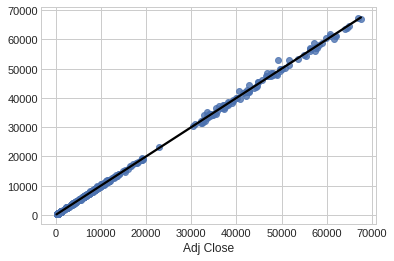

In [56]:
btc_model = LinearRegression()

my_pipeline = Pipeline(steps=[('btc_model', btc_model)])
my_pipeline.fit(train_X, train_y)

preds = my_pipeline.predict(val_X)

mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

sns.regplot(x=val_y, y=preds, line_kws={"color":"black"})

In [57]:
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())

rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is",rmse)

r2 = r2_score(val_y, preds)
print("\nr2 score is", r2)

MAE scores:
 [  2.85029321   2.58814362   3.12422883  23.84699072 144.63111044
  46.93865883  86.82419053  73.44931122 434.97817847 551.32296307] 

Average MAE score (across all ten folds):
137.05540689332938

RMSE is 322.8396394305566

r2 score is 0.9995579140943768


In [58]:
my_model = XGBRegressor()
my_model.fit(train_X, train_y)

predictions = my_model.predict(val_X)
print("Mean Absolute Error: ",mean_absolute_error(predictions, val_y))

[07:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error:  197.71084852293697


[07:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error 183.3515594366241

RMSE is 430.4855115335567

r2 score is 0.9992139502376647


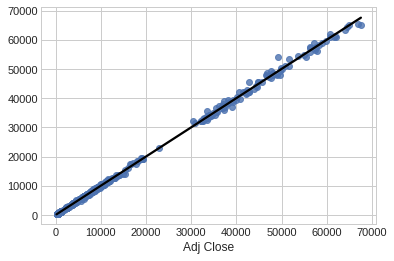

In [59]:
my_model = XGBRegressor(n_estimators=1000,
                        learning_rate=0.03,
                        n_jobs=4)
my_model.fit(train_X, train_y,
            early_stopping_rounds=5,
            eval_set=[(val_X, val_y)],
            verbose=False)

predictions = my_model.predict(val_X)
print("Mean Absolute Error",
      mean_absolute_error(predictions,val_y))

rmse = math.sqrt(mean_squared_error(val_y,predictions))
print("\nRMSE is", rmse)

r2 = r2_score(val_y,predictions)
print("\nr2 score is", r2)

sns.regplot(x=val_y, y=predictions, line_kws={"color": "black"})

In [60]:
plt.style.use("seaborn-whitegrid")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [61]:
X = df.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2708    44575.203125
2709    43961.859375
2710    40538.011719
2711    40030.976563
2712    40126.429688
Name: Close, Length: 2713, dtype: float64

In [62]:
def make_mi_scores (X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

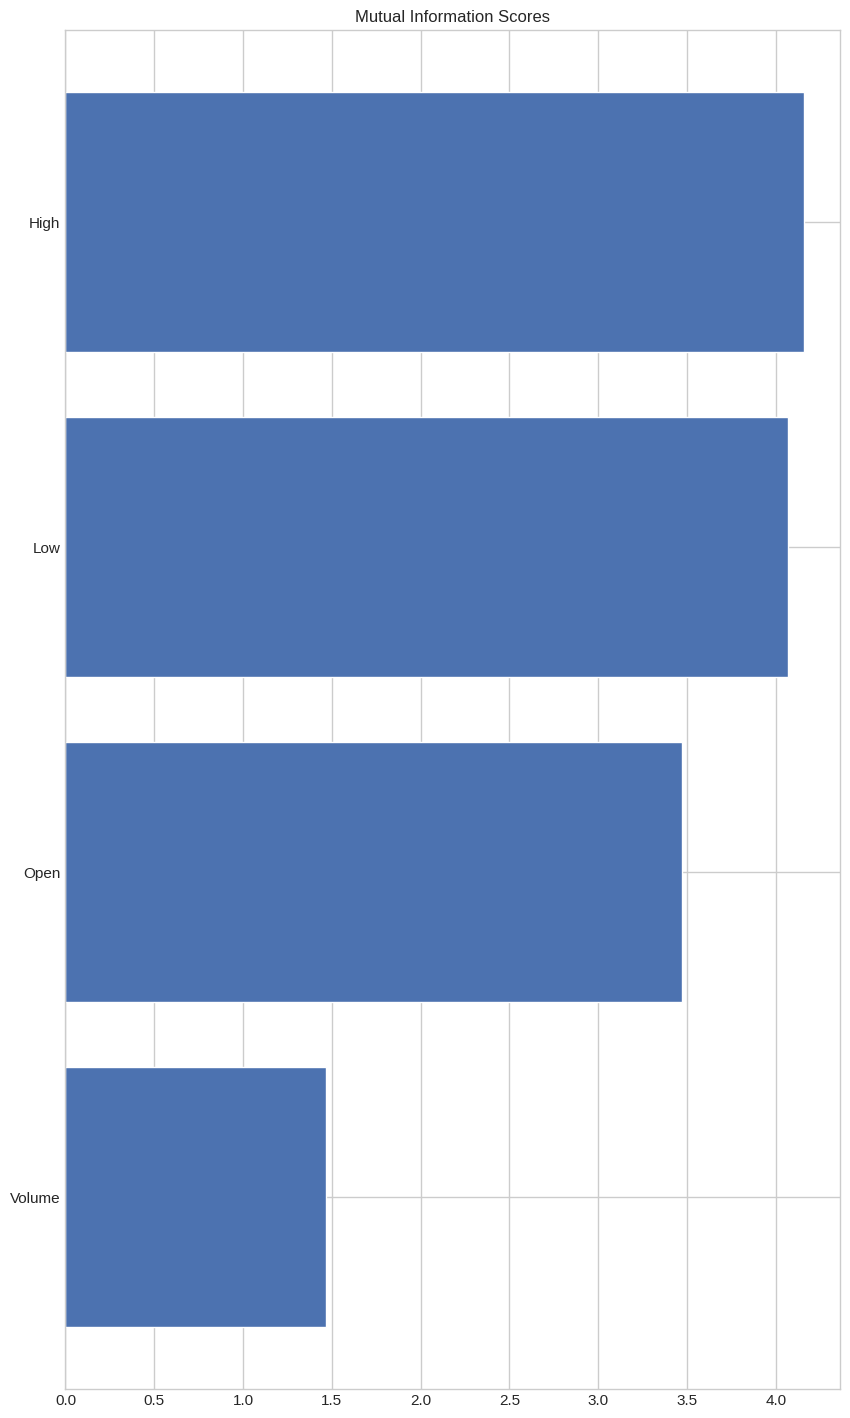

In [63]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(10,18))
plot_mi_scores(mi_scores)

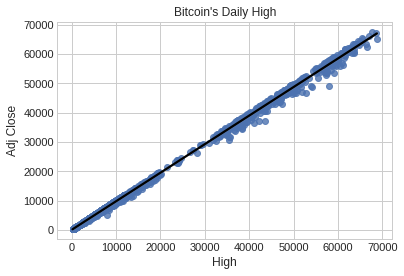

In [64]:
daily_high = sns.regplot(x="High", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Bitcoin's Daily High")

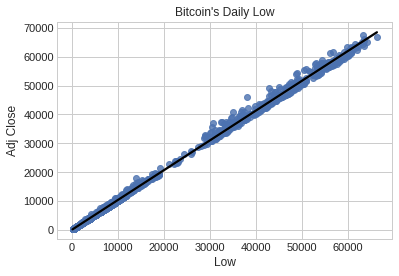

In [65]:
daily_low = sns.regplot(x="Low", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Bitcoin's Daily Low")

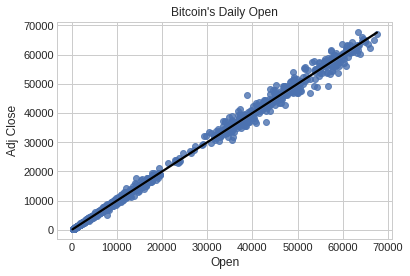

In [66]:
daily_close = sns.regplot(x="Open", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Bitcoin's Daily Open")

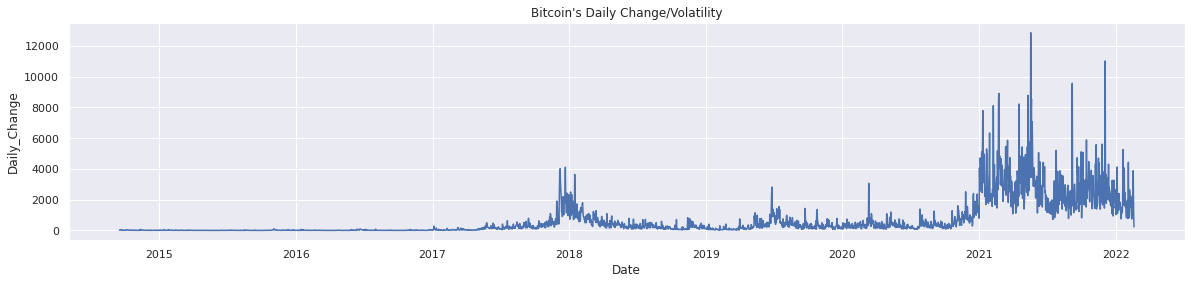

In [67]:
df["Daily_Change"] = abs(X.High - X.Low)

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Daily_Change", data=df).set(title="Bitcoin's Daily Change/Volatility")

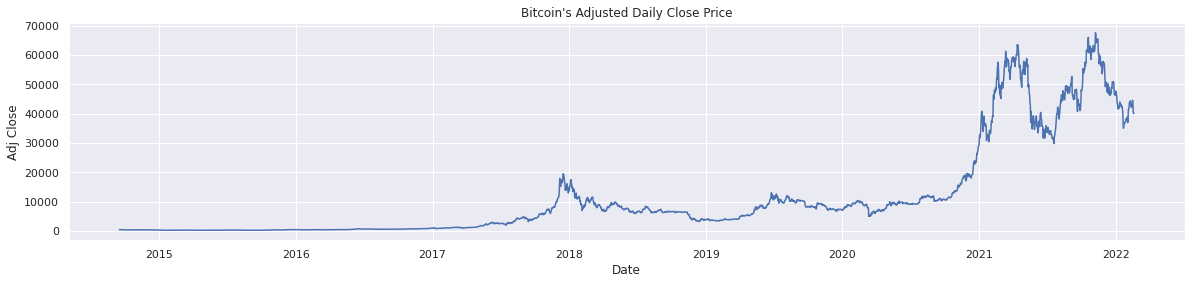

In [68]:
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Adj Close", data=df).set(title="Bitcoin's Adjusted Daily Close Price")

In [69]:
features = ["High", "Low", "Open"]

X = df.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')
X = X.loc[:, features]

X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [70]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

component_names = [f"PC{i+1}" for i in range (X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3
0,-1.167130,0.000483,-0.000495
1,-1.169302,0.002026,-0.000666
2,-1.172547,0.001984,-0.000466
3,-1.173562,0.000906,0.000690
4,-1.173339,0.000750,-0.000356


In [71]:
loadings = pd.DataFrame(
    pca.components_.T,       # Transpose the matrix of loadings
    columns=component_names, # to turn columns into principal components
    index = X.columns,       # and the rows are original features, so we can identify them
)
loadings

,PC1,PC2,PC3
High,0.577374,0.445146,0.684459
Low,0.577291,-0.815388,0.043324
Open,0.577385,0.370118,-0.727763


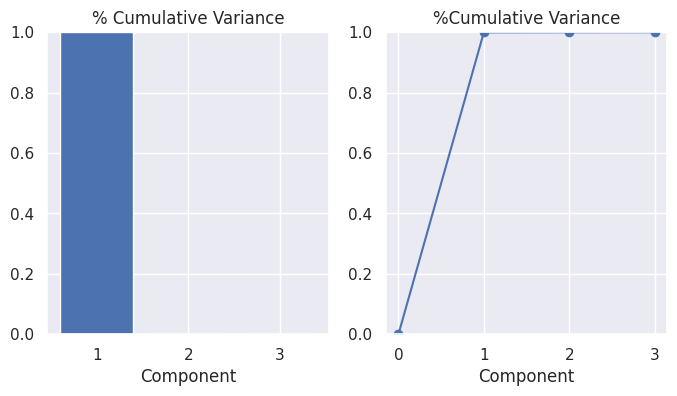

In [72]:
def plot_variance(pca, width=8, dpi=100):
    fig, axs = plt.subplots(1,2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0,cv], "o-")
    axs[1].set(
        xlabel="Component", title="%Cumulative Variance", ylim=(0.0,1.0)
    )
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

In [73]:
mi_scores = make_mi_scores(X_pca, y)
mi_scores

PC1    3.912676
PC2    1.031249
PC3    0.962325
Name: MI Scores, dtype: float64

MAE: 136.18568534715638


[Text(0.5, 1.0, 'Linear Regression with PCA')]

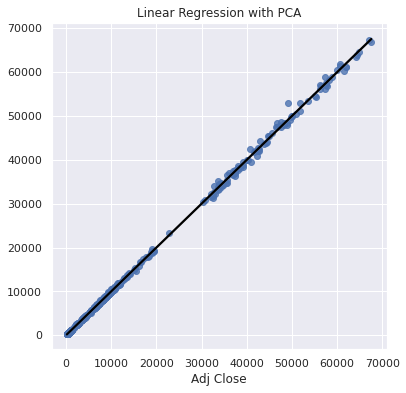

In [74]:
train_X, val_X, train_y, val_y = train_test_split(X_pca, y, random_state = 0)

btc_model = LinearRegression()

my_pipeline = Pipeline(steps=[('btc_model', btc_model)])
my_pipeline.fit(train_X, train_y)

preds = my_pipeline.predict(val_X)

mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

sns.set(rc={"figure.figsize":(6,6)})
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"}).set(title="Linear Regression with PCA")

In [75]:
scores = -1 * cross_val_score(my_pipeline, X_pca, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())
rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is", rmse)
r2 = r2_score(val_y,preds)
print("\nr2 score is", r2)

MAE scores:
 [  4.65141576   3.84277202   2.56952909  23.23633898 144.66774625
  46.70810826  87.24406524  75.7133545  432.21932708 550.39451645] 

Average MAE score (across all ten folds):
137.12471736298116

RMSE is 322.966773630793

r2 score is 0.9995575658390959


In [76]:
results = [['Linear Regression', 0.221, 0.326, 0.999672],
           ['Gradient Boosting (XGBoost)', 0.325, 0.490, 0.999259],
           ['Linear Regression with PCA', 0.193, 0.275, 0.999766]]
results_df = pd.DataFrame(results, columns = ['Model Type', 'MAE', 'RMSE', 'r2'])
results_df

,Model Type,MAE,RMSE,r2
0,Linear Regression,0.221,0.326,0.999672
1,Gradient Boosting (XGBoost),0.325,0.490,0.999259
2,Linear Regression with PCA,0.193,0.275,0.999766
